In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df1=pd.read_csv("E:\Data Scientist\Project_1\Bengaluru_House_Data.csv")
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [32]:
df1.balcony.isna().sum()

609

In [33]:
df2=df1.drop(['area_type','availability','society','balcony'], axis='columns')
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [40]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [43]:
df3=df2.dropna()

In [44]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3

C:\Windows\TEMP/ipykernel_6172/2355601815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


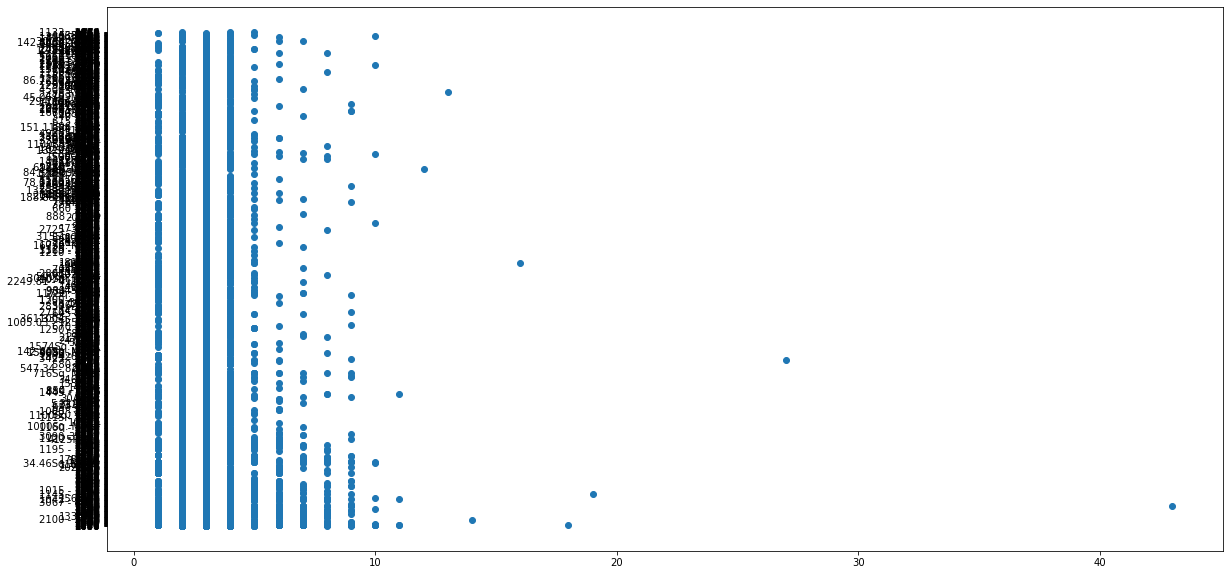

In [50]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.scatter(df3.bhk,df3.total_sqft)
plt.show()

In [52]:
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [53]:
df3[df3.bhk>15]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
11559,1Kasavanhalli,18 Bedroom,1200,18.0,200.0,18


In [54]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [55]:
def is_float(x):
    try:
        float(x)
    except :
        return False
    return True

In [62]:
is_float("v")

False

In [64]:
df3[~df3.total_sqft.apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [65]:
def convert_total_sqft_to_num(x):
    datas=x.split('-')
    if len(datas)==2:
        return (float (datas[0])+ float(datas[1]))/2
    try:
        return float(x)
    except:
        return None

In [69]:
convert_total_sqft_to_num("2")

2.0

In [71]:
df4=df3.copy()
df4.total_sqft=df4.total_sqft.apply(convert_total_sqft_to_num)
df4

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [80]:
df5= df4.copy()
df5

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [86]:
df5['price_per_sqft']= round(((df5.price*100000)/df5.total_sqft),2)
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.83
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.11
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.55
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.34


In [88]:
df5.location=df5.location.apply( lambda x: x.strip())
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.83
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.11
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.55
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.34


In [100]:
df4.groupby('location')['location'].agg('count').sort_values(ascending=False)

location
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
Thanisandra            233
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1304, dtype: int64

In [91]:
location_state=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [94]:
df5.location=df5.location.apply(lambda x: 'other' if x in location_state[location_state<10] else x)

In [98]:
df5[df5.location=='other']

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.51
18,other,3 BHK,2770.0,4.0,290.00,3,10469.31
19,other,2 BHK,1100.0,2.0,48.00,2,4363.64
25,other,3 BHK,1250.0,3.0,56.00,3,4480.00
49,other,2 BHK,869.0,2.0,36.00,2,4142.69
...,...,...,...,...,...,...,...
13291,other,1 Bedroom,812.0,1.0,26.00,1,3201.97
13292,other,3 BHK,1440.0,2.0,63.93,3,4439.58
13302,other,2 BHK,1075.0,2.0,48.00,2,4465.12
13306,other,4 Bedroom,1200.0,5.0,325.00,4,27083.33


In [101]:
df5=df5.drop('size',axis='columns')
df5

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.89
4,Kothanur,1200.0,2.0,51.00,2,4250.00
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.83
13316,other,3600.0,5.0,400.00,4,11111.11
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.55
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.34


In [102]:
df5

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.89
4,Kothanur,1200.0,2.0,51.00,2,4250.00
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.83
13316,other,3600.0,5.0,400.00,4,11111.11
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.55
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.34


In [104]:
df5[df5.bhk>15]

,location,total_sqft,bath,price,bhk,price_per_sqft
1718,other,8000.0,27.0,230.0,27,2875.00
3379,other,2000.0,16.0,490.0,19,24500.00
3609,other,10000.0,16.0,550.0,16,5500.00
4684,Munnekollal,2400.0,40.0,660.0,43,27500.00
11559,other,1200.0,18.0,200.0,18,16666.67


In [106]:
df6=df5[~ ((df5.total_sqft/df5.bhk)<300)]
df6

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.89
4,Kothanur,1200.0,2.0,51.00,2,4250.00
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.83
13316,other,3600.0,5.0,400.00,4,11111.11
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.55
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.34


In [108]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502836
std        4168.127366
min         267.830000
25%        4210.530000
50%        5294.120000
75%        6916.670000
max      176470.590000
Name: price_per_sqft, dtype: float64

In [112]:
df6[df6.price_per_sqft<2000]

,location,total_sqft,bath,price,bhk,price_per_sqft
132,Electronic City,880.0,1.0,16.5,2,1875.00
514,Banashankari Stage III,8500.0,4.0,145.0,4,1705.88
674,Yelahanka,35000.0,3.0,130.0,3,371.43
810,other,10961.0,4.0,80.0,4,729.86
996,Chikkabanavar,1200.0,1.0,20.0,1,1666.67
1894,other,52272.0,2.0,140.0,3,267.83
2404,Yelahanka New Town,960.0,2.0,18.0,1,1875.00
2421,other,2000.0,3.0,25.0,4,1250.00
3976,other,1500.0,1.0,19.5,1,1300.00
4105,other,5800.0,5.0,80.0,5,1379.31


In [128]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10222, 6)

In [129]:
df7

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.00,4,15017.54
1,1st Block Jayanagar,1630.0,3.0,194.00,3,11901.84
2,1st Block Jayanagar,1875.0,2.0,235.00,3,12533.33
3,1st Block Jayanagar,1200.0,2.0,130.00,3,10833.33
4,1st Block Jayanagar,1235.0,2.0,148.00,2,11983.81
...,...,...,...,...,...,...
10217,other,1353.0,2.0,110.00,2,8130.08
10218,other,812.0,1.0,26.00,1,3201.97
10219,other,1440.0,2.0,63.93,3,4439.58
10220,other,1075.0,2.0,48.00,2,4465.12


In [130]:
def plot_scatter_chart (df, location):
    bhk2= df[(df.location == location) & (df.bhk==2)]
    bhk3= df[(df.location == location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(20,10)
    plt.scatter(bhk2.total_sqft, bhk2.price_per_sqft, color='blue', label='2BHK')
    plt.scatter(bhk3.total_sqft, bhk3.price_per_sqft, color='red', label='3BHK')
    plt.xlabel("Total sqft area")
    plt.ylabel("Price per sqft")
    plt.legend()

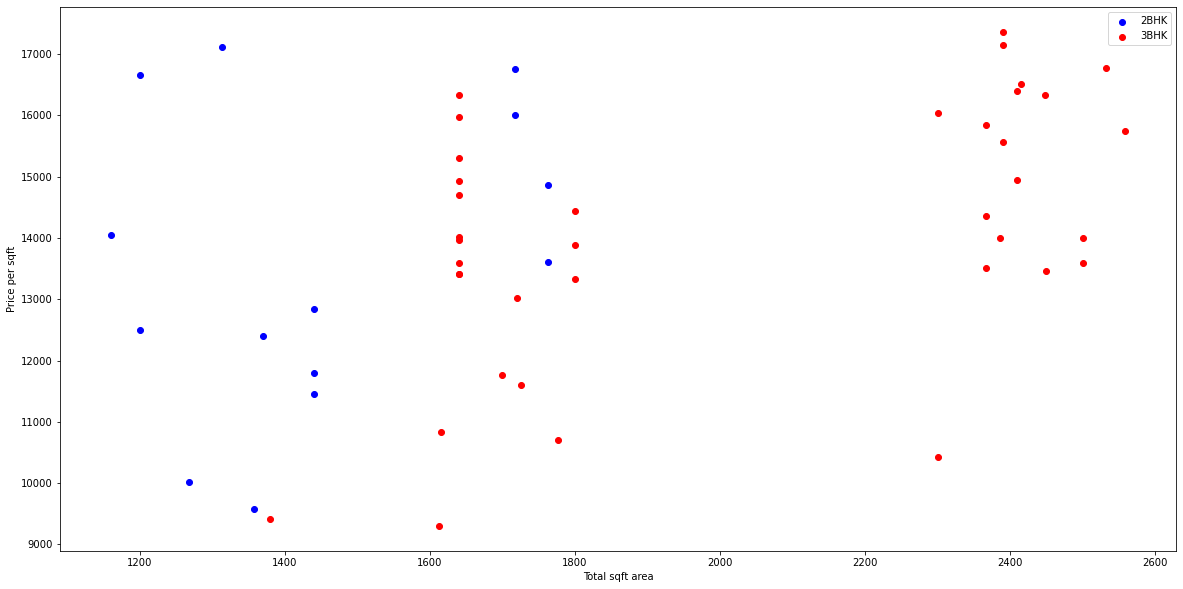

In [131]:
plot_scatter_chart(df7,"Rajaji Nagar")

In [140]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    bhk_state={}
    
    for loc, loc_df in df.groupby('location'):
        print("Location : "+str(loc)+" Loc data : "+str(loc_df))
        for bhk, bhk_df in loc_df.groupby('bhk'):
            bhk_state[bhk]={
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
            
        for bhk, bhk_df in loc_df.groupby('bhk'):
            stats= bhk_state.get(bhk-1)
            print("stats: "+str(stats)+" bhk-1 :"+str(bhk-1))
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')
    
    
            

In [141]:
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

Location : 1st Block Jayanagar Loc data :               location  total_sqft  bath  price  bhk  price_per_sqft
0  1st Block Jayanagar      2850.0   4.0  428.0    4        15017.54
1  1st Block Jayanagar      1630.0   3.0  194.0    3        11901.84
2  1st Block Jayanagar      1875.0   2.0  235.0    3        12533.33
3  1st Block Jayanagar      1200.0   2.0  130.0    3        10833.33
4  1st Block Jayanagar      1235.0   2.0  148.0    2        11983.81
5  1st Block Jayanagar      2750.0   4.0  413.0    4        15018.18
6  1st Block Jayanagar      2450.0   4.0  368.0    4        15020.41
stats: None bhk-1 :1
stats: {'mean': 11983.81, 'std': 0.0, 'count': 1} bhk-1 :2
stats: {'mean': 11756.166666666666, 'std': 701.6245624897185, 'count': 3} bhk-1 :3
Location : 1st Block Koramangala Loc data :                  location  total_sqft  bath  price  bhk  price_per_sqft
7   1st Block Koramangala      1415.0   2.0  110.0    2         7773.85
8   1st Block Koramangala       860.0   2.0   65.5    2

Location : Anandapura Loc data :        location  total_sqft  bath  price  bhk  price_per_sqft
416  Anandapura      1167.0   2.0  43.76    2         3749.79
417  Anandapura      1000.0   2.0  55.00    2         5500.00
418  Anandapura      1141.0   2.0  42.79    2         3750.22
419  Anandapura      1576.0   3.0  59.10    3         3750.00
420  Anandapura      1200.0   2.0  67.00    2         5583.33
421  Anandapura      1200.0   2.0  58.00    2         4833.33
422  Anandapura      1151.0   2.0  43.10    2         3744.57
423  Anandapura      1141.0   2.0  42.75    2         3746.71
424  Anandapura       900.0   2.0  48.00    2         5333.33
425  Anandapura      1749.0   4.0  90.00    4         5145.80
426  Anandapura      1151.0   2.0  42.90    2         3727.19
427  Anandapura      1576.0   3.0  58.00    3         3680.20
428  Anandapura      1250.0   2.0  45.00    2         3600.00
429  Anandapura      1151.0   2.0  43.16    2         3749.78
430  Anandapura      1200.0   2.0  58

stats: {'mean': 5041.8025, 'std': 2237.0654201584603, 'count': 4} bhk-1 :4
Location : Banjara Layout Loc data :            location  total_sqft  bath  price  bhk  price_per_sqft
817  Banjara Layout      1200.0   2.0   70.0    2         5833.33
818  Banjara Layout      1050.0   2.0   64.8    2         6171.43
819  Banjara Layout       753.0   3.0   59.5    2         7901.73
820  Banjara Layout      2500.0   4.0  140.0    3         5600.00
stats: {'mean': 6641.37, 'std': 0.0, 'count': 1} bhk-1 :1
stats: {'mean': 6635.496666666666, 'std': 905.9389395661398, 'count': 3} bhk-1 :2
Location : Bannerghatta Loc data :          location  total_sqft  bath  price  bhk  price_per_sqft
821  Bannerghatta      3012.0   6.0  250.0    4         8300.13
822  Bannerghatta      1665.0   3.0  110.0    3         6606.61
823  Bannerghatta      2370.0   4.0  195.0    3         8227.85
824  Bannerghatta      1100.0   2.0   66.0    2         6000.00
825  Bannerghatta      1113.0   2.0   70.0    2         6289.31

1244  Bhoganhalli      1703.0   3.0  120.00    3         7046.39
stats: {'mean': 4210.53, 'std': 0.0, 'count': 1} bhk-1 :1
stats: {'mean': 5417.4158333333335, 'std': 285.3690588068467, 'count': 12} bhk-1 :2
stats: {'mean': 6125.419999999999, 'std': 899.1117697611776, 'count': 13} bhk-1 :3
Location : Billekahalli Loc data :           location  total_sqft  bath   price  bhk  price_per_sqft
1245  Billekahalli      1935.0   3.0  110.00    3         5684.75
1246  Billekahalli      1125.0   2.0   62.00    2         5511.11
1247  Billekahalli      1650.0   3.0   88.00    3         5333.33
1248  Billekahalli      1090.0   2.0   52.00    2         4770.64
1249  Billekahalli      1112.0   2.0   62.00    2         5575.54
1250  Billekahalli      2400.0   3.0  150.00    3         6250.00
1251  Billekahalli      2968.0   3.0  225.00    3         7580.86
1252  Billekahalli       950.0   2.0   58.11    2         6116.84
1253  Billekahalli      1360.0   2.0  110.00    2         8088.24
1254  Billekaha

1500  CV Raman Nagar      1310.0   2.0   62.0    2         4732.82
stats: None bhk-1 :0
stats: {'mean': 7092.2, 'std': 0.0, 'count': 1} bhk-1 :1
stats: {'mean': 5155.725000000001, 'std': 750.615619158701, 'count': 18} bhk-1 :2
Location : Chamrajpet Loc data :         location  total_sqft  bath   price  bhk  price_per_sqft
1501  Chamrajpet      1475.0   2.0  120.00    3         8135.59
1502  Chamrajpet      1900.0   2.0  170.00    4         8947.37
1503  Chamrajpet      1350.0   2.0  180.00    2        13333.33
1504  Chamrajpet      1050.0   2.0  162.00    2        15428.57
1505  Chamrajpet      1660.4   4.0  211.00    4        12707.78
1506  Chamrajpet       505.0   1.0   85.00    1        16831.68
1507  Chamrajpet      1565.0   3.0   98.91    3         6320.13
1508  Chamrajpet       730.0   1.0   52.00    2         7123.29
1509  Chamrajpet       650.0   1.0   40.00    2         6153.85
1510  Chamrajpet       650.0   2.0   45.00    2         6923.08
1511  Chamrajpet      1650.0   3.0  

stats: {'mean': 2520.609999999999, 'std': 140.157340532928, 'count': 19} bhk-1 :1
stats: {'mean': 9450.336666666668, 'std': 1592.3121405539666, 'count': 3} bhk-1 :2
stats: {'mean': 11852.602499999999, 'std': 1661.3848732364065, 'count': 4} bhk-1 :3
Location : Cox Town Loc data :       location  total_sqft  bath  price  bhk  price_per_sqft
1708  Cox Town      1975.0   3.0  150.0    3         7594.94
1709  Cox Town      1650.0   3.0  100.0    3         6060.61
1710  Cox Town      1730.0   3.0  140.0    3         8092.49
1711  Cox Town      1600.0   3.0  150.0    3         9375.00
1712  Cox Town      1250.0   2.0   95.0    2         7600.00
1713  Cox Town      1280.0   2.0  120.0    2         9375.00
1714  Cox Town      1073.0   2.0   72.0    2         6710.16
1715  Cox Town      1000.0   2.0   58.0    2         5800.00
1716  Cox Town      1200.0   2.0  140.0    2        11666.67
stats: {'mean': 2520.609999999999, 'std': 140.157340532928, 'count': 19} bhk-1 :1
stats: {'mean': 8230.366, 's

1843  Doddakallasandra      1072.0   2.0  42.87    2         3999.07
stats: {'mean': 7492.35, 'std': 0.0, 'count': 1} bhk-1 :1
stats: {'mean': 4009.2616666666668, 'std': 22.42976921910293, 'count': 6} bhk-1 :2
Location : Doddathoguru Loc data :           location  total_sqft  bath  price  bhk  price_per_sqft
1844  Doddathoguru       970.0   2.0   33.0    2         3402.06
1845  Doddathoguru      1050.0   2.0   32.0    2         3047.62
1846  Doddathoguru       850.0   2.0   25.0    2         2941.18
1847  Doddathoguru      1030.0   2.0   42.0    2         4077.67
1848  Doddathoguru      1549.0   3.0   65.0    3         4196.26
1849  Doddathoguru      1875.0   3.0   55.0    3         2933.33
1850  Doddathoguru       550.0   1.0   17.0    1         3090.91
1851  Doddathoguru      1015.0   2.0   33.5    2         3300.49
1852  Doddathoguru      1104.0   2.0   39.0    2         3532.61
1853  Doddathoguru       915.0   2.0   32.0    2         3497.27
1854  Doddathoguru       750.0   1.0   2

2383  Electronics City Phase 1     1175.00   2.0  60.00    2         5106.38
stats: None bhk-1 :0
stats: {'mean': 4522.3042857142855, 'std': 635.4101419411189, 'count': 7} bhk-1 :1
stats: {'mean': 4842.117878787879, 'std': 498.0513656712685, 'count': 33} bhk-1 :2
Location : Frazer Town Loc data :          location  total_sqft  bath   price  bhk  price_per_sqft
2384  Frazer Town      1700.0   3.0  180.00    3        10588.24
2385  Frazer Town      1305.0   3.0   95.45    3         7314.18
2386  Frazer Town      1870.0   3.0  185.00    3         9893.05
2387  Frazer Town      1750.0   3.0  150.00    3         8571.43
2388  Frazer Town      4850.0   6.0  385.00    4         7938.14
2389  Frazer Town      2000.0   3.0  200.00    3        10000.00
2390  Frazer Town      3500.0   4.0  330.00    3         9428.57
2391  Frazer Town      2350.0   4.0  285.00    3        12127.66
2392  Frazer Town      1550.0   2.0  140.00    2         9032.26
2393  Frazer Town      1900.0   4.0  145.00    3    

2987  Hebbal Kempapura      2485.0   4.0  198.0    4         7967.81
stats: {'mean': 6608.7, 'std': 0.0, 'count': 1} bhk-1 :1
stats: {'mean': 8716.5, 'std': 1081.9230965738739, 'count': 4} bhk-1 :2
stats: {'mean': 9517.563076923076, 'std': 939.9190636382117, 'count': 13} bhk-1 :3
stats: {'mean': 8861.2425, 'std': 978.620646761936, 'count': 4} bhk-1 :4
Location : Hegde Nagar Loc data :          location  total_sqft  bath  price  bhk  price_per_sqft
2988  Hegde Nagar     1569.00   3.0  101.0    3         6437.22
2989  Hegde Nagar     3000.00   7.0  210.0    6         7000.00
2990  Hegde Nagar     2026.00   3.0  132.0    3         6515.30
2991  Hegde Nagar     1801.00   3.0  115.0    3         6385.34
2992  Hegde Nagar     1050.00   1.0   56.0    2         5333.33
2993  Hegde Nagar     1341.00   2.0   97.0    2         7233.41
2994  Hegde Nagar     2112.95   4.0  145.0    3         6862.44
2995  Hegde Nagar     1200.00   4.0   83.0    4         6916.67
2996  Hegde Nagar     1703.00   3.0 

stats: {'mean': 5935.229166666667, 'std': 932.1087833192928, 'count': 12} bhk-1 :3
stats: {'mean': 5916.665, 'std': 583.335, 'count': 2} bhk-1 :4
Location : Hulimavu Loc data :       location  total_sqft  bath   price  bhk  price_per_sqft
3458  Hulimavu      1125.0   2.0   50.00    2         4444.44
3459  Hulimavu      1242.0   2.0   51.00    2         4106.28
3460  Hulimavu      1650.0   3.0   78.00    3         4727.27
3461  Hulimavu      1823.0   3.0  100.00    3         5485.46
3462  Hulimavu      1300.0   2.0   36.00    2         2769.23
3463  Hulimavu      1080.0   2.0   43.20    2         4000.00
3464  Hulimavu      1100.0   2.0   71.50    2         6500.00
3465  Hulimavu      1758.0   3.0   65.00    3         3697.38
3466  Hulimavu       688.0   1.0   50.00    1         7267.44
3467  Hulimavu      1255.0   2.0   73.00    2         5816.73
3468  Hulimavu      1200.0   4.0   75.00    4         6250.00
3469  Hulimavu      1058.0   2.0   48.00    2         4536.86
3470  Hulimavu   

stats: {'mean': 4400.0, 'std': 0.0, 'count': 1} bhk-1 :1
stats: {'mean': 4174.759615384616, 'std': 487.0896467914202, 'count': 26} bhk-1 :2
stats: {'mean': 4487.236315789473, 'std': 479.55651033242805, 'count': 19} bhk-1 :3
Location : Kaggalipura Loc data :          location  total_sqft  bath  price  bhk  price_per_sqft
3932  Kaggalipura      1150.0   2.0   55.0    3         4782.61
3933  Kaggalipura       700.0   1.0   38.0    1         5428.57
3934  Kaggalipura      1210.0   2.0   58.0    3         4793.39
3935  Kaggalipura       700.0   1.0   36.0    1         5142.86
3936  Kaggalipura       950.0   2.0   48.0    2         5052.63
3937  Kaggalipura      1000.0   2.0   60.0    2         6000.00
3938  Kaggalipura       950.0   2.0   50.0    2         5263.16
3939  Kaggalipura       950.0   2.0   47.0    2         4947.37
3940  Kaggalipura      1150.0   2.0   62.0    3         5391.30
3941  Kaggalipura       700.0   1.0   35.0    1         5000.00
3942  Kaggalipura      1150.0   2.0   

4469  Kengeri       550.0   1.0   16.75    1         3045.45
stats: None bhk-1 :0
stats: {'mean': 4102.123333333333, 'std': 591.7449526236413, 'count': 9} bhk-1 :1
stats: {'mean': 4390.756333333335, 'std': 671.5401054912671, 'count': 30} bhk-1 :2
stats: {'mean': 6387.76, 'std': 205.07000000000016, 'count': 2} bhk-1 :4
stats: {'mean': 3928.57, 'std': 0.0, 'count': 1} bhk-1 :7
Location : Kengeri Satellite Town Loc data :                     location  total_sqft  bath   price  bhk  price_per_sqft
4470  Kengeri Satellite Town       890.0   2.0  35.000    2         3932.58
4471  Kengeri Satellite Town       883.0   2.0  45.000    2         5096.26
4472  Kengeri Satellite Town      1415.0   2.0  66.000    3         4664.31
4473  Kengeri Satellite Town       930.0   1.0  30.000    1         3225.81
4474  Kengeri Satellite Town      1635.0   2.0  78.000    3         4770.64
4475  Kengeri Satellite Town      1050.0   2.0  43.000    2         4095.24
4476  Kengeri Satellite Town      1007.0   2.

stats: None bhk-1 :0
stats: {'mean': 4892.344999999999, 'std': 107.6550000000002, 'count': 2} bhk-1 :1
stats: {'mean': 4854.5648, 'std': 214.79266455109675, 'count': 25} bhk-1 :2
stats: {'mean': 5472.538148148149, 'std': 749.1486105155046, 'count': 27} bhk-1 :3
stats: {'mean': 6622.1, 'std': 140.62000000000035, 'count': 2} bhk-1 :4
Location : Kudlu Loc data :      location  total_sqft  bath   price  bhk  price_per_sqft
4706    Kudlu      1152.0   2.0   53.50    2         4644.10
4707    Kudlu      1027.0   2.0   43.00    2         4186.95
4708    Kudlu      1092.0   2.0   44.00    2         4029.30
4709    Kudlu      1027.0   2.0   43.00    2         4186.95
4710    Kudlu      1092.0   2.0   44.00    2         4029.30
4711    Kudlu      1143.0   2.0   55.00    2         4811.90
4712    Kudlu      1455.0   2.0   60.00    3         4123.71
4713    Kudlu      1024.0   2.0   44.00    2         4296.88
4714    Kudlu      1570.0   2.0   65.94    3         4200.00
4715    Kudlu      1600.0   

[149 rows x 6 columns]
stats: None bhk-1 :0
stats: {'mean': 6443.712, 'std': 707.7100543979858, 'count': 5} bhk-1 :1
stats: {'mean': 5343.012394366199, 'std': 805.7154978143406, 'count': 71} bhk-1 :2
stats: {'mean': 5765.145094339623, 'std': 889.5761711117812, 'count': 53} bhk-1 :3
Location : Margondanahalli Loc data :              location  total_sqft  bath  price  bhk  price_per_sqft
5141  Margondanahalli      1090.0   2.0  58.00    2         5321.10
5142  Margondanahalli      1200.0   2.0  58.50    2         4875.00
5143  Margondanahalli      1200.0   2.0  67.00    2         5583.33
5144  Margondanahalli      1200.0   2.0  65.00    3         5416.67
5145  Margondanahalli      1000.0   2.0  57.00    2         5700.00
5146  Margondanahalli      1625.0   3.0  80.00    3         4923.08
5147  Margondanahalli       600.0   2.0  35.00    2         5833.33
5148  Margondanahalli      1200.0   2.0  69.00    2         5750.00
5149  Margondanahalli       900.0   2.0  49.00    2         5444.44

5327  Nagavarapalya      1260.0   2.0   85.5    2         6785.71
stats: None bhk-1 :0
stats: {'mean': 7854.6125, 'std': 262.38831722992137, 'count': 4} bhk-1 :1
stats: {'mean': 7379.16, 'std': 622.9095873934411, 'count': 3} bhk-1 :2
Location : Narayanapura Loc data :           location  total_sqft  bath   price  bhk  price_per_sqft
5328  Narayanapura      1308.0   2.0   89.04    2         6807.34
5329  Narayanapura      1566.0   3.0   83.30    3         5319.28
5330  Narayanapura      1485.0   3.0   85.00    3         5723.91
5331  Narayanapura      1302.0   2.0   69.10    2         5307.22
5332  Narayanapura      1308.0   2.0   89.04    2         6807.34
5333  Narayanapura      2357.0   3.0  135.00    3         5727.62
5334  Narayanapura      2357.0   3.0  135.00    3         5727.62
5335  Narayanapura      1469.0   2.0   99.14    2         6748.81
stats: {'mean': 7854.6125, 'std': 262.38831722992137, 'count': 4} bhk-1 :1
stats: {'mean': 6417.677500000001, 'std': 641.5680633562973, '

stats: {'mean': 3750.0, 'std': 0.0, 'count': 1} bhk-1 :1
stats: {'mean': 6037.44, 'std': 549.2879230118451, 'count': 6} bhk-1 :2
stats: {'mean': 8026.070000000001, 'std': 1550.1626296833074, 'count': 3} bhk-1 :3
Location : R.T. Nagar Loc data :         location  total_sqft  bath  price  bhk  price_per_sqft
5564  R.T. Nagar      1500.0   4.0   70.0    4         4666.67
5565  R.T. Nagar      1200.0   2.0  120.0    2        10000.00
5566  R.T. Nagar      1560.0   3.0   85.0    3         5448.72
5567  R.T. Nagar      1040.0   2.0   46.0    2         4423.08
5568  R.T. Nagar      1200.0   2.0   45.0    2         3750.00
5569  R.T. Nagar      1235.0   2.0   65.0    2         5263.16
5570  R.T. Nagar      1140.0   3.0  130.0    3        11403.51
5571  R.T. Nagar       970.0   2.0   55.0    2         5670.10
5572  R.T. Nagar      1560.0   3.0  125.0    3         8012.82
5573  R.T. Nagar      1200.0   2.0   60.0    2         5000.00
5574  R.T. Nagar      1680.0   3.0   72.0    3         4285.71

Location : Sarjapura - Attibele Road Loc data :                        location  total_sqft  bath  price  bhk  price_per_sqft
6412  Sarjapura - Attibele Road      1330.0   2.0  48.00    3         3609.02
6413  Sarjapura - Attibele Road      1329.0   2.0  45.95    3         3457.49
6414  Sarjapura - Attibele Road       829.0   2.0  22.80    2         2750.30
6415  Sarjapura - Attibele Road      2400.0   3.0  85.00    3         3541.67
6416  Sarjapura - Attibele Road      1033.0   2.0  28.41    2         2750.24
6417  Sarjapura - Attibele Road      1676.0   3.0  52.00    3         3102.63
6418  Sarjapura - Attibele Road      1800.0   3.0  90.00    3         5000.00
6419  Sarjapura - Attibele Road      1308.0   2.0  37.00    2         2828.75
6420  Sarjapura - Attibele Road      1073.0   2.0  31.77    2         2960.86
6421  Sarjapura - Attibele Road      1330.0   2.0  49.00    3         3684.21
6422  Sarjapura - Attibele Road      1090.0   2.0  37.00    2         3394.50
6423  Sarjapura 

Location : Thanisandra Loc data :          location  total_sqft  bath    price  bhk  price_per_sqft
6650  Thanisandra       510.0   1.0   25.250    1         4950.98
6651  Thanisandra      1296.0   2.0   80.000    2         6172.84
6652  Thanisandra      1436.0   3.0   74.750    3         5205.43
6653  Thanisandra      2144.0   3.0  145.000    3         6763.06
6654  Thanisandra      1075.0   2.0   45.800    2         4260.47
...           ...         ...   ...      ...  ...             ...
6797  Thanisandra      1573.0   3.0  100.000    3         6357.28
6798  Thanisandra      1533.0   3.0   75.885    3         4950.10
6799  Thanisandra      2259.0   3.0  112.000    4         4957.95
6800  Thanisandra      1917.0   4.0  130.000    4         6781.43
6801  Thanisandra      1226.0   2.0   65.590    2         5349.92

[152 rows x 6 columns]
stats: None bhk-1 :0
stats: {'mean': 5507.9, 'std': 849.6961145942247, 'count': 23} bhk-1 :1
stats: {'mean': 5577.183541666666, 'std': 859.66434604464

7202  Vijayanagar      1375.0   2.0   75.00    3         5454.55
stats: None bhk-1 :0
stats: {'mean': 7513.335000000001, 'std': 1470.164614499002, 'count': 4} bhk-1 :1
stats: {'mean': 5936.626363636363, 'std': 879.0177155963534, 'count': 11} bhk-1 :2
stats: {'mean': 6585.511176470588, 'std': 860.4387712630886, 'count': 17} bhk-1 :3
stats: {'mean': 12000.0, 'std': 0.0, 'count': 1} bhk-1 :4
Location : Vishveshwarya Layout Loc data :                   location  total_sqft  bath  price  bhk  price_per_sqft
7203  Vishveshwarya Layout       750.0   1.0   30.0    1         4000.00
7204  Vishveshwarya Layout      2000.0   4.0   75.0    4         3750.00
7205  Vishveshwarya Layout      2100.0   6.0   92.0    6         4380.95
7206  Vishveshwarya Layout      2000.0   3.0   90.0    4         4500.00
stats: None bhk-1 :0
stats: {'mean': 6585.511176470588, 'std': 860.4387712630886, 'count': 17} bhk-1 :3
stats: {'mean': 5208.33, 'std': 0.0, 'count': 1} bhk-1 :5
Location : Vishwapriya Layout Loc data

(7348, 6)

In [142]:
df9=df8[df8.bath<(df8.bhk+2)]
df9

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.54
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.84
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.33
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.33
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.81
...,...,...,...,...,...,...
10213,other,1200.0,2.0,70.0,2,5833.33
10214,other,1800.0,1.0,200.0,1,11111.11
10217,other,1353.0,2.0,110.0,2,8130.08
10218,other,812.0,1.0,26.0,1,3201.97


In [146]:
df10=df9.drop('price_per_sqft', axis='columns')
df10

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10213,other,1200.0,2.0,70.0,2
10214,other,1800.0,1.0,200.0,1
10217,other,1353.0,2.0,110.0,2
10218,other,812.0,1.0,26.0,1


In [147]:
dummies = pd.get_dummies(df10.location)
dummies

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10213,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [148]:
df11=pd.concat([df10,dummies.drop(['other'],axis='columns')], axis='columns')
df11

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10213,other,1200.0,2.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10214,other,1800.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10217,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10218,other,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
df12=df11.drop('location',axis='columns')
df12

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10213,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10214,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10217,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10218,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [151]:
y=df12.price
x=df12.drop('price',axis='columns')

In [152]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)
x_train

,total_sqft,bath,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
3968,1450.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9887,1200.0,3.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8432,1300.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6111,1451.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9451,905.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8933,1020.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7402,1150.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2571,1783.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2291,1160.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)
lr_model.score(x_test,y_test)

0.8478370927769968

In [157]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score


In [159]:
cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.84499893, 0.89251081, 0.81666575, 0.83629358, 0.85587574])

In [171]:
def predict_price(location,sqft,bath,bhk):
    if location=='other':
        location='Yeshwanthpur'
    loc_index= np.where(x.columns==location)[0][0]
    X=np.zeros(len(x.columns))
    X[0]=sqft
    X[1]=bath
    X[2]=bhk
    if loc_index >=0:
        X[loc_index]=1
    return lr_model.predict([X])[0]



In [172]:
predict_price("other",2850.0,4.0,4)

223.61384745259596

In [174]:
import pickle

with open('E:\Data Scientist\Project_1\Benglore_house_price_model.pickle','wb')as f:
    pickle.dump(lr_model,f)

In [176]:
import json
columns={
    'data_columns': [col.lower() for col in x.columns]
    
}

with open('E:\Data Scientist\Project_1\columns.json','w') as f:
    f.write(json.dumps(columns))

# Function find best model with there best parameters using Gridsearch

In [177]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [183]:
def find_best_model_using_gridsearch(x,y):
    algo={
        'linear_regression':{
            'model': LinearRegression(),
            'params': {
                'normalize':[True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    
    scores=[]
    
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algo.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [184]:

find_best_model_using_gridsearch(x,y)

,model,best_score,best_params
0,linear_regression,0.849269,{'normalize': False}
1,lasso,0.696295,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.789279,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
